In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import scipy as sc
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [275]:
def eq(e,v0,m,h_cortado,lb,lw,q):
    y = []
    for e in x:  
        k = np.sqrt(2*m*e*q/(h_cortado**2))
        chi = np.sqrt(2*m*(v0-e)*q/(h_cortado**2))
        phi = np.arctan(np.sqrt((v0-e)/e))
        r = np.sqrt(k**2+chi**2)
        
        #print(k, chi, phi, r)
        fator =(64)*((k*chi)**4)/(r**8)
        
        parenteses1 = (1-np.cosh(2*chi*lb))
        
        a=4*((np.sin(k*lw))**2)
        
        b = 4*np.sinh(2*chi*lb)*np.sin(k*lw)*np.sin(4*phi)*np.cos(k*lw)
        
        c = -4*np.cosh(2*chi*lb)*np.cos(4*phi)*(np.sin(k*lw)**2)
        
        d = -(np.sin(4*phi)**2)
        
        parenteses2 = a+b+c+d
        
        termo_extra = (2*(np.cosh(2*chi*lb)**2))*(1-np.cos(4*phi))
        #print(fator,parenteses1,parenteses2,termo_extra)
        
        eq = parenteses1*parenteses2+termo_extra
        eq = 1/eq
        eq = fator*eq
        y.append(eq)
    
    return y


In [276]:

#v0 = 300e-3 #eV
v0 = 0.5
q = 1.602e-19    # elementary charge (C)
#m = 0.28 * 9.1095e-31   # absolute mass of a particle (kg)
m = 9.10938356e-31 #kg
#h_cortado = 6.58211928e-16 #eV
h_cortado = 1.0545718e-34 #J
lb = 1.8e-9  #m
lw = 3e-9 #m


In [277]:
M=1000
x = np.linspace(v0 / M, v0 - v0 / M, M - 1)
y = eq(x,v0,m,h_cortado,lb,lw,q)

#print(y)

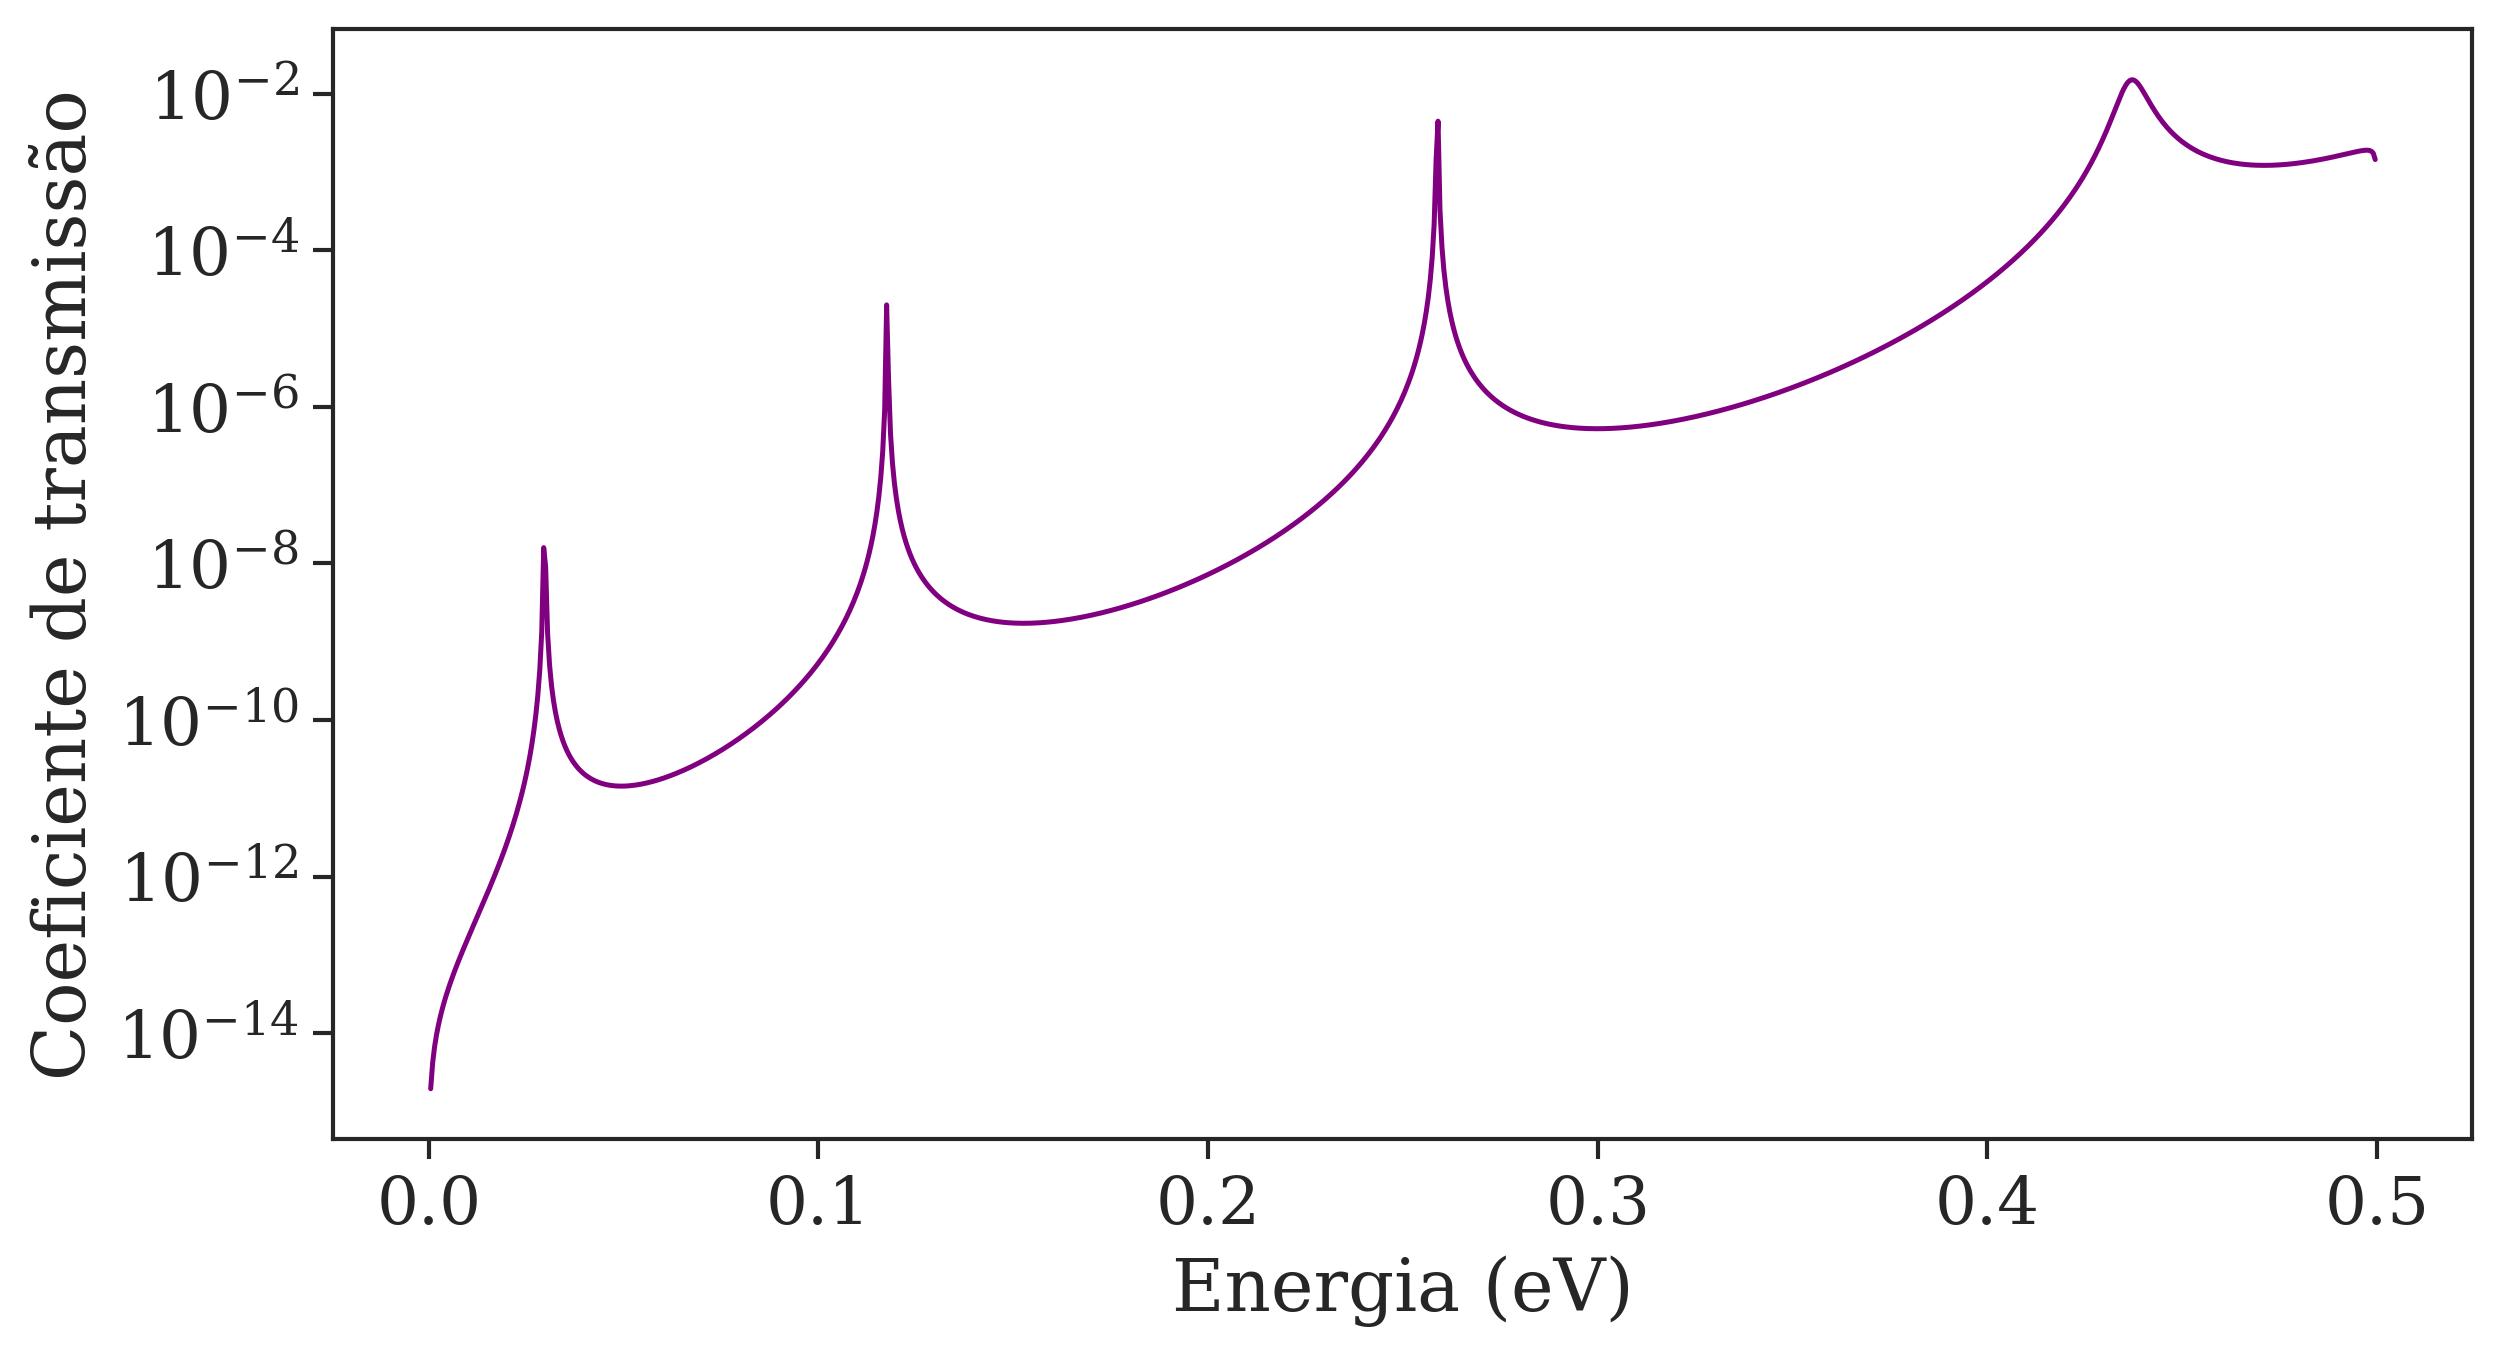

In [278]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.plot(x,y, color = 'purple')
plt.yscale('log')
plt.ylabel('Coeficiente de transmissão')
plt.xlabel(r'Energia (eV)')
plt.savefig('double_barrier')
plt.show()